In [1]:
import sys
import logging
import gym
from gym import spaces
import numpy as np
import networkx as nx
import cyberbattle.simulation.actions as actions
import cyberbattle._env.cyberbattle_env as cyberbattle_env
import cyberbattle.agents.random_agent as random_agent
import cyberbattle.samples.chainpattern.chainpattern as chainpattern
import importlib
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity


In [2]:
gym_env = gym.make('CyberBattleCBSHH-v0')

iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10

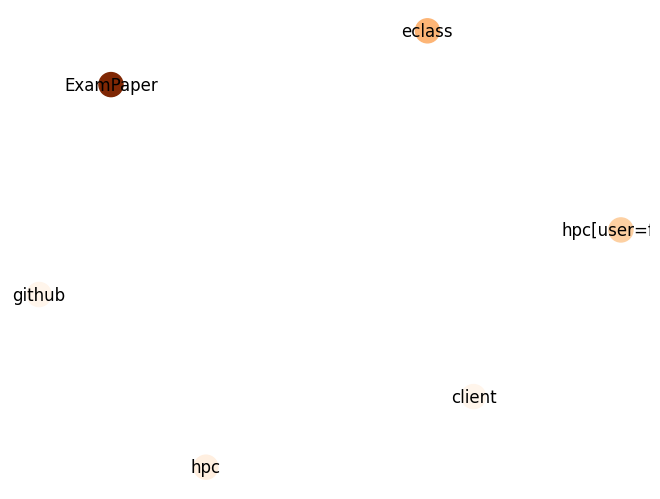

In [3]:
gym_env.environment.plot_environment_graph()

In [5]:
ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=6,
    maximum_total_credentials=5,
    identifiers=gym_env.identifiers
)

In [6]:
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=True,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
